# Cluster Analysis

## Import required packages

In [2]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates


## i. Utilities Dataset 

In [3]:
# Load and preprocess data
utilities_df = pd.read_csv('Utilities.csv')
utilities_df.set_index('Company', inplace=True)
utilities_df = utilities_df.apply(lambda x: x.astype('float64'))



In [4]:
utilities_df

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,1.06,9.2,151.0,54.4,1.6,9077.0,0.0,0.628
Boston,0.89,10.3,202.0,57.9,2.2,5088.0,25.3,1.555
Central,1.43,15.4,113.0,53.0,3.4,9212.0,0.0,1.058
Commonwealth,1.02,11.2,168.0,56.0,0.3,6423.0,34.3,0.700
NY,1.49,8.8,192.0,51.2,1.0,3300.0,15.6,2.044
Florida,1.32,13.5,111.0,60.0,-2.2,11127.0,22.5,1.241
Hawaiian,1.22,12.2,175.0,67.6,2.2,7642.0,0.0,1.652
Idaho,1.10,9.2,245.0,57.0,3.3,13082.0,0.0,0.309
Kentucky,1.34,13.0,168.0,60.4,7.2,8406.0,0.0,0.862


In [5]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(utilities_df)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=utilities_df.index)

In [6]:
memb

Company
Arizona         0
Boston          5
Central         0
Commonwealth    5
NY              3
Florida         0
Hawaiian        1
Idaho           4
Kentucky        1
Madison         5
Nevada          2
New England     5
Northern        1
Oklahoma        0
Pacific         5
Puget           2
San Diego       5
Southern        0
Texas           4
Wisconsin       1
United          5
Virginia        0
dtype: int32

In [4]:
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  Arizona , Central , Florida , Oklahoma, Southern, Virginia
1 :  Hawaiian , Kentucky, Northern, Wisconsin
2 :  Nevada, Puget
3 :  NY
4 :  Idaho, Texas
5 :  Boston , Commonwealth, Madison , New England, Pacific , San Diego, United


In [5]:
utilities_df_norm = utilities_df.apply(preprocessing.scale, axis=0)

In [7]:
utilities_df_norm

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,-0.300057,-0.700750,-0.426938,-0.591310,-0.538611,0.046983,-0.731447,-0.873765
Boston,-1.243092,-0.199030,0.840322,0.211704,-0.341667,-1.103127,0.810687,0.832436
Central,1.752432,2.127130,-1.371171,-0.912516,0.052220,0.085906,-0.731447,-0.082323
Commonwealth,-0.521947,0.211469,-0.004518,-0.224218,-0.965322,-0.718219,1.359271,-0.741244
NY,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470
Florida,1.142233,1.260521,-1.420868,0.693512,-1.785921,0.638040,0.640016,0.254499
Hawaiian,0.587506,0.667579,0.169420,2.437200,-0.341667,-0.366757,-0.731447,1.010970
Idaho,-0.078166,-0.700750,1.908797,0.005214,0.019396,1.201706,-0.731447,-1.460904
Kentucky,1.253178,1.032466,-0.004518,0.785285,1.299530,-0.146480,-0.731447,-0.443073


In [8]:
# Normalized distance


kmeans = KMeans(n_clusters=8, random_state=0).fit(utilities_df_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=utilities_df_norm.index)


memb


Company
Arizona         7
Boston          2
Central         0
Commonwealth    1
NY              5
Florida         0
Hawaiian        3
Idaho           4
Kentucky        0
Madison         1
Nevada          4
New England     3
Northern        1
Oklahoma        7
Pacific         3
Puget           4
San Diego       6
Southern        0
Texas           7
Wisconsin       1
United          3
Virginia        2
dtype: int32

In [9]:
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  Central , Florida , Kentucky, Southern
1 :  Commonwealth, Madison , Northern, Wisconsin
2 :  Boston , Virginia
3 :  Hawaiian , New England, Pacific , United
4 :  Idaho, Nevada, Puget
5 :  NY
6 :  San Diego
7 :  Arizona , Oklahoma, Texas


   Fixed_charge    RoR   Cost  Load_factor  Demand_growth  Sales  Nuclear  \
0         0.948  1.318 -0.812        0.126         -0.153  0.233   -0.389   
1         0.047  0.588  0.244       -0.305         -0.005 -0.599    1.780   
2        -0.744 -0.427  0.492       -0.201          0.266 -0.382    0.850   
3        -0.148 -0.416  0.300        1.428         -0.301 -0.630   -0.718   
4        -0.614 -0.853  1.370       -0.492          1.015  1.900   -0.731   
5         2.085 -0.883  0.592       -1.325         -0.736 -1.619    0.219   
6        -1.964 -1.978 -0.800        1.129          1.890 -0.923   -0.226   
7        -0.060  0.105 -1.272       -0.974         -0.965  0.530   -0.731   

   Fuel_Cost  
0     -0.065  
1     -0.855  
2      0.603  
3      1.221  
4     -0.988  
5      1.732  
6      1.504  
7     -0.893  


(-0.5, 7.5)

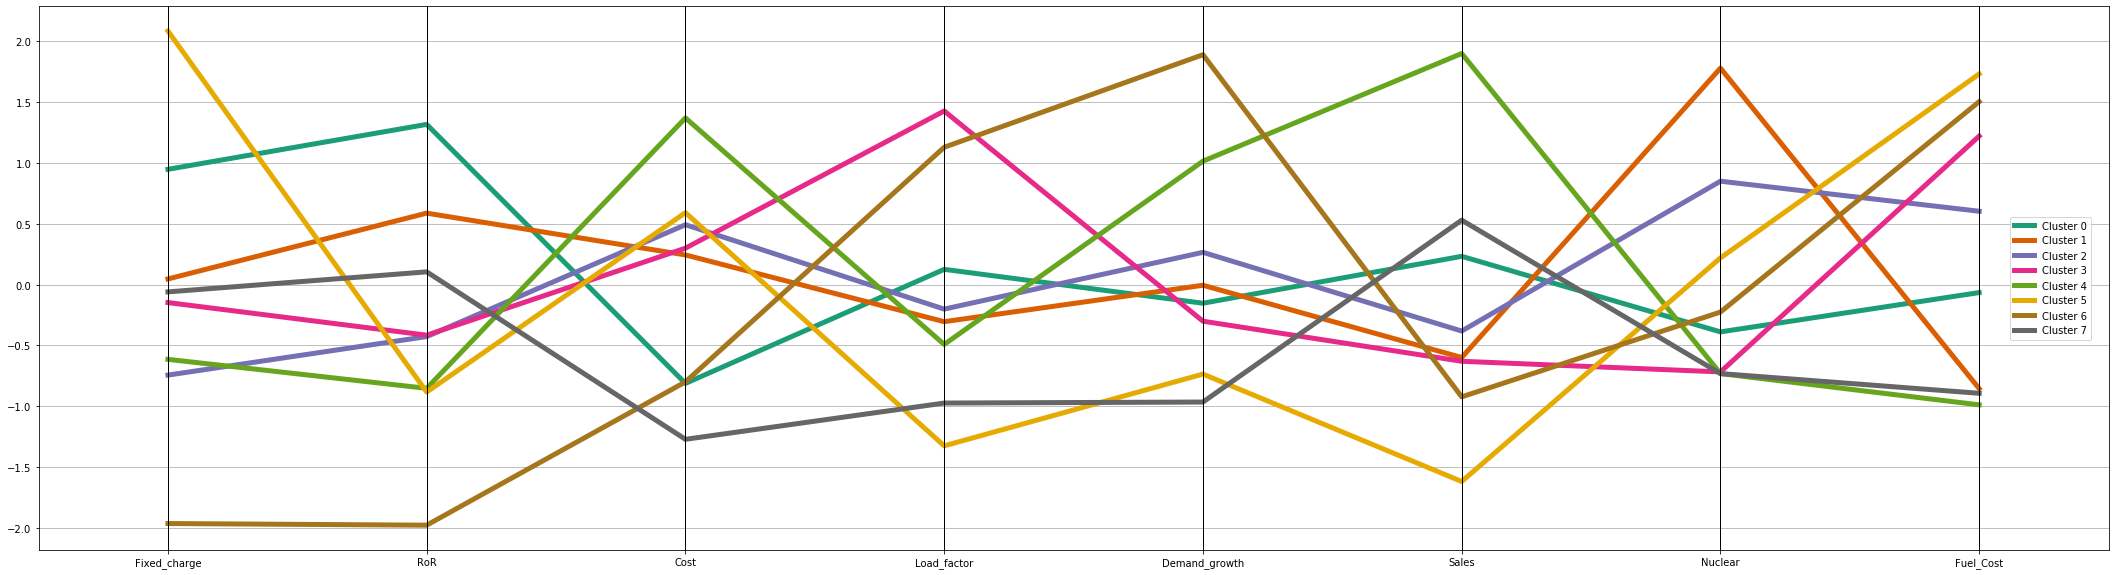

In [10]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=utilities_df_norm.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
fig=plt.figure(figsize=(10,10),facecolor='white')
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)


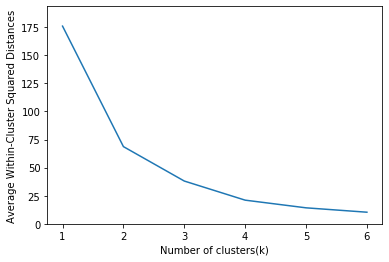

In [11]:
fig, ax = plt.subplots(facecolor='white')
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(utilities_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia', ax=ax)
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
ax.patch.set_facecolor('white')
plt.show()

## ii. Clustering - Automotive Dataset

In [12]:
# Load and preprocess data
car_df = pd.read_csv('Car_Sales.csv')
car_df = car_df.drop(columns= ['manufact','sales'])
car_df.set_index('model', inplace=True)
car_df = car_df.apply(lambda x: x.astype('float64'))
car_df

,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
model,,,,,,,,,,
Integra,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.64,13.2,28.0
TL,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.52,17.2,25.0
RL,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.85,18.0,22.0
A4,0.0,23.99,1.8,150.0,102.6,68.2,178.0,3.00,16.4,27.0
A6,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.56,18.5,22.0
...,...,...,...,...,...,...,...,...,...,...
V40,0.0,24.40,1.9,160.0,100.5,67.6,176.6,3.04,15.8,25.0
S70,0.0,27.50,2.4,168.0,104.9,69.3,185.9,3.21,17.9,25.0
V70,0.0,28.80,2.4,168.0,104.9,69.3,186.2,3.26,17.9,25.0


In [13]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(car_df)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=car_df.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  A4, Century, Malibu, Lumina, Monte Carlo, Impala, Sebring Coupe, Sebring Conv., Avenger, Stratus, Ram Wagon, Ram Van, Caravan, Contour, Taurus, Windstar, CR-V, Sonata, Eclipse, Galant, 3000GT, Montero Sport, Sable, Villager, Altima, Quest, Pathfinder, Xterra, Frontier, Cutlass, Alero, Voyager, Sunfire, Grand Am, 44079, Outback, Forester, 4Runner, Passat, S40, V40, S70, V70
1 :  TL, Regal, Escalade, LHS, 300M, Ram Pickup, Durango, Expedition, F-Series, I30, S-Type, GS300, LX470, Town car, E-Class, Maxima, Aurora, Prowler, Land Cruiser, C70
2 :  Integra, Cavalier, Prizm, Metro, Cirrus, Neon, Dakota, Escort, Focus, Ranger, Civic, Accord, Accent, Elantra, Wrangler, Mirage, Mystique, Cougar, Sentra, Neon, Breeze, SL, SC, SW, LW, LS, Corolla, Camry, Celica, Tacoma, RAV4, Golf, Jetta, Cabrio, GTI, Beetle
3 :  A8, DeVille, Eldorado, Corvette, GS400, LS400, Continental, Navigator, S-Class, SL-Class, CL500, Carrera Coupe, Carrera Cabriolet
4 :  RL, A6, 328i, 528i, Park Avenue, LeSabre, Cate

    type   price  engine_s  horsepow  wheelbas   width   length  curb_wgt  \
0  0.326  21.336     2.740   162.395   107.109  70.893  187.970     3.307   
1  0.350  36.619     3.915   234.750   114.970  74.230  197.675     4.024   
2  0.139  14.610     1.989   120.306   102.736  68.175  176.425     2.678   
3  0.077  57.931     4.477   296.077   108.500  73.115  193.131     3.865   
4  0.342  29.707     3.345   200.342   108.139  71.674  189.003     3.614   
5  0.000  69.720     8.000   450.000    96.200  75.700  176.700     3.380   

   fuel_cap     mpg  
0    18.000  23.535  
1    20.795  20.650  
2    14.406  28.389  
3    21.085  20.923  
4    18.726  22.705  
5    19.000  16.000  


(-0.5, 7.5)

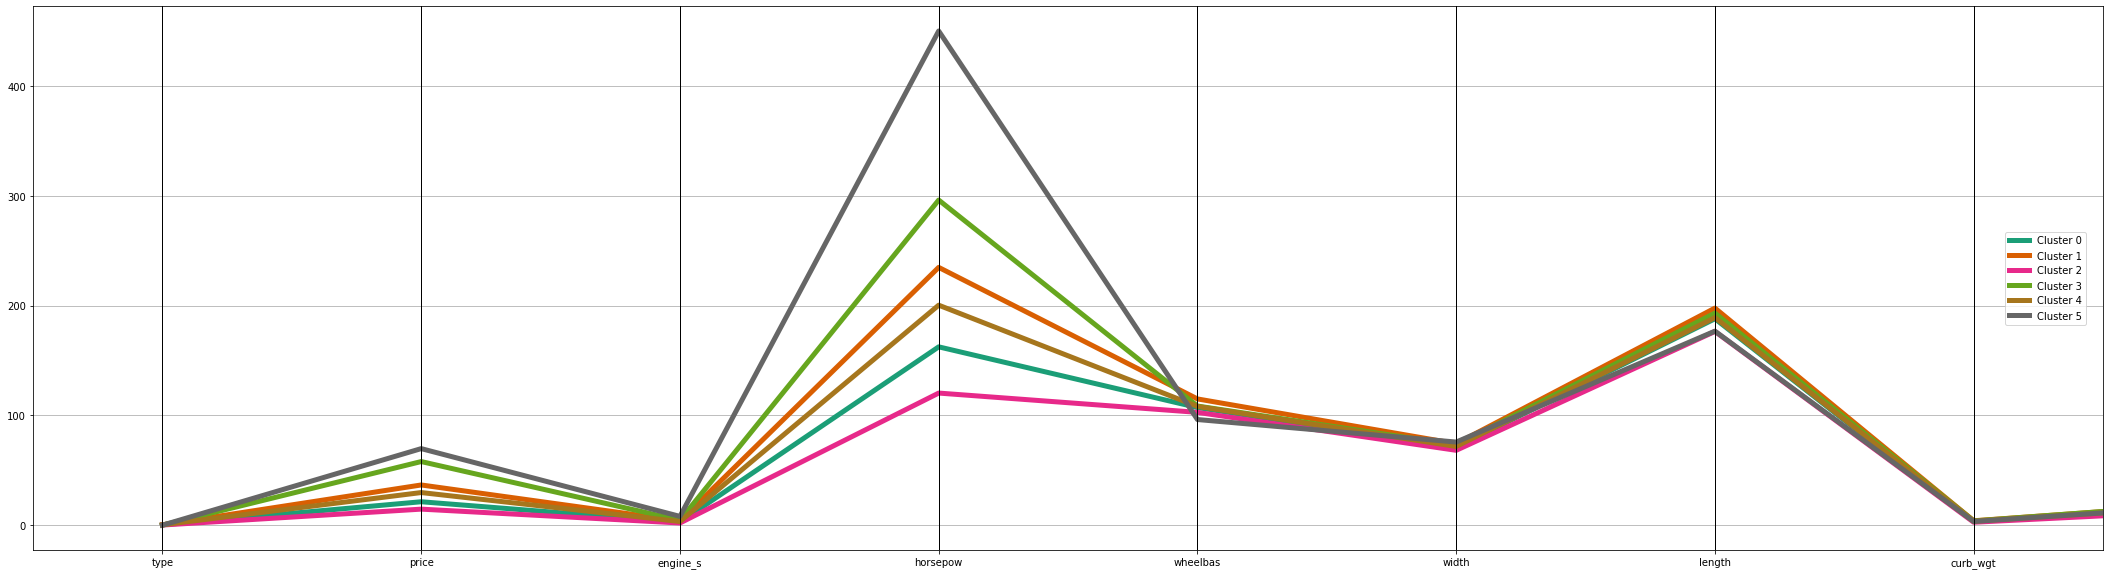

In [12]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=car_df.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
fig=plt.figure(figsize=(10,10),facecolor='white')
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)

In [14]:
# Normalized distance
car_df_norm = car_df.apply(preprocessing.scale, axis=0)

kmeans = KMeans(n_clusters=6, random_state=0).fit(car_df_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=car_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  TL, RL, A6, 528i, Century, Regal, Park Avenue, LeSabre, DeVille, Eldorado, Catera, Lumina, Monte Carlo, Camaro, Impala, Concorde, LHS, 300M, Mustang, Taurus, Crown Victoria, I30, S-Type, ES300, GS300, Continental, Town car, Diamante, Sable, Grand Marquis, E-Class, Maxima, Aurora, Prowler, Firebird, Grand Prix, Bonneville, Avalon, C70, S80
1 :  Escalade, Ram Pickup, Ram Wagon, Ram Van, Durango, Expedition, F-Series, LX470, Navigator, Land Cruiser
2 :  Integra, Cavalier, Prizm, Metro, Neon, Escort, Focus, Civic, Accent, Elantra, Mirage, SLK, SLK230, Sentra, Neon, SL, SC, SW, Corolla, Celica, RAV4, Golf, Jetta, Cabrio, GTI, Beetle
3 :  A8, Corvette, Viper, GS400, LS400, S-Class, SL-Class, CL500, Carrera Coupe, Carrera Cabriolet
4 :  Dakota, Caravan, Explorer, Windstar, Ranger, Passport, Odyssey, Cherokee, Grand Cherokee, RX300, Montero, Montero Sport, Mountaineer, Villager, M-Class, Quest, Pathfinder, Xterra, Frontier, Bravada, Silhouette, Voyager, Montana, Sienna, 4Runner
5 :  A4, 3

    type  price  engine_s  horsepow  wheelbas  width  length  curb_wgt  \
0 -0.600  0.198     0.412     0.502     0.329  0.590   0.722     0.298   
1  1.666  0.528     1.656     0.767     1.755  1.881   1.247     2.226   
2 -0.513 -0.779    -1.099    -1.123    -1.019 -1.031  -1.275    -1.273   
3 -0.600  2.692     1.570     2.332    -0.243  0.336  -0.037     0.436   
4  1.666 -0.176     0.197    -0.107     0.579  0.148   0.157     0.654   
5 -0.374 -0.387    -0.627    -0.480    -0.407 -0.567  -0.294    -0.545   

   fuel_cap    mpg  
0    -0.014 -0.054  
1     2.470 -1.843  
2    -1.168  1.364  
3     0.658 -0.727  
4     0.702 -0.759  
5    -0.447  0.284  


(-0.5, 7.5)

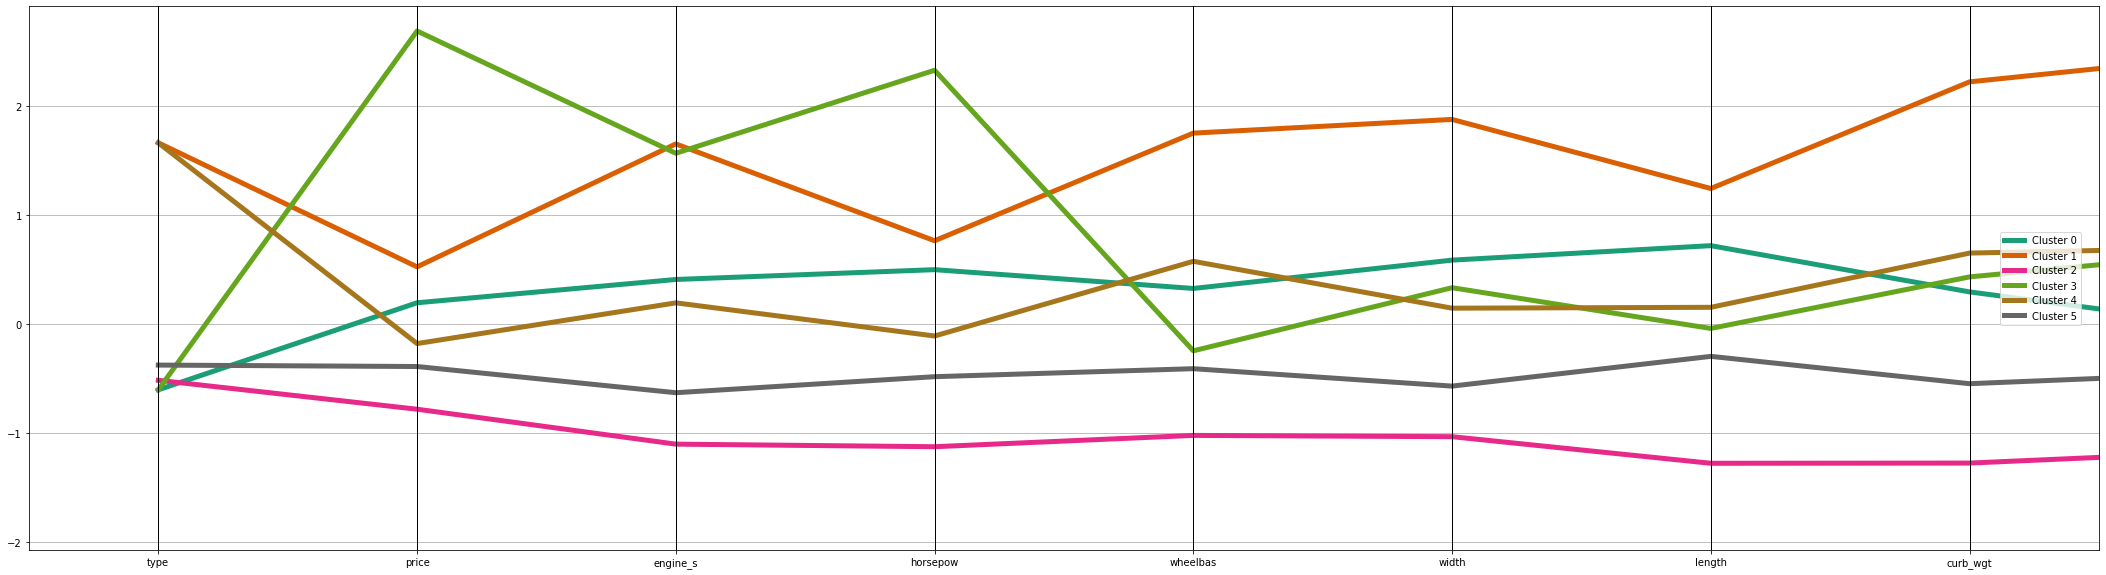

In [15]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=car_df.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
fig=plt.figure(figsize=(10,10),facecolor='white')
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)

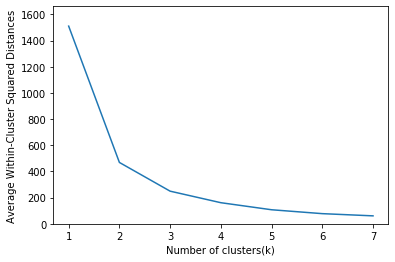

In [14]:
fig, ax = plt.subplots(facecolor='white')
inertia = []
for n_clusters in range(1, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(car_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 8), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia', ax=ax)
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
ax.patch.set_facecolor('white')
plt.show()